In [1]:
!pip install skforecast --user

In [2]:
# Import Libraries

from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [3]:
df = pd.read_csv('FarmersSentimentsnewdataset.csv')

In [4]:
df.head()

,Unnamed: 0,Date,ID,Tweet,word_count,char_count,stopwords,hastags,numerics,upper,sentiment,Polarity_Rating
0,0,23/03/2020 02:30,1.380000e+18,support ud83dudc47nnfarmersprotest,3,40,0,0,0,0,0.00000,Neutral
1,1,24/03/2020 02:31,1.380000e+18,supporting mean supporting country httpstcoiwp...,10,112,1,2,0,0,0.06250,Positive
2,2,25/03/2020 02:31,1.380000e+18,support related food httpstcotcozx4zmyu,12,107,4,2,0,0,0.00000,Neutral
3,3,26/03/2020 02:32,1.380000e+18,support pressurising got accept genuine demand,12,104,2,2,0,0,0.40000,Positive
4,4,27/03/2020 02:32,1.380000e+18,hate hate nif love love you! nnstophateagainst...,17,109,2,0,0,2,-0.11875,Negative


In [5]:
df['Date'].value_counts()

23/03/2020 02:30    1
18/09/2022 08:04    1
26/09/2022 08:07    1
25/09/2022 08:06    1
24/09/2022 08:06    1
                   ..
20/06/2021 05:17    1
19/06/2021 05:17    1
18/06/2021 05:16    1
17/06/2021 05:16    1
09/05/2023 09:36    1
Name: Date, Length: 1367, dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df.Date, errors='coerce',infer_datetime_format=True )

In [7]:
print('Starting date:',  df['Date'].min())
print('Ending date:',  df['Date'].max())

Starting date: 2020-03-23 02:30:00
Ending date: 2023-05-09 09:36:00


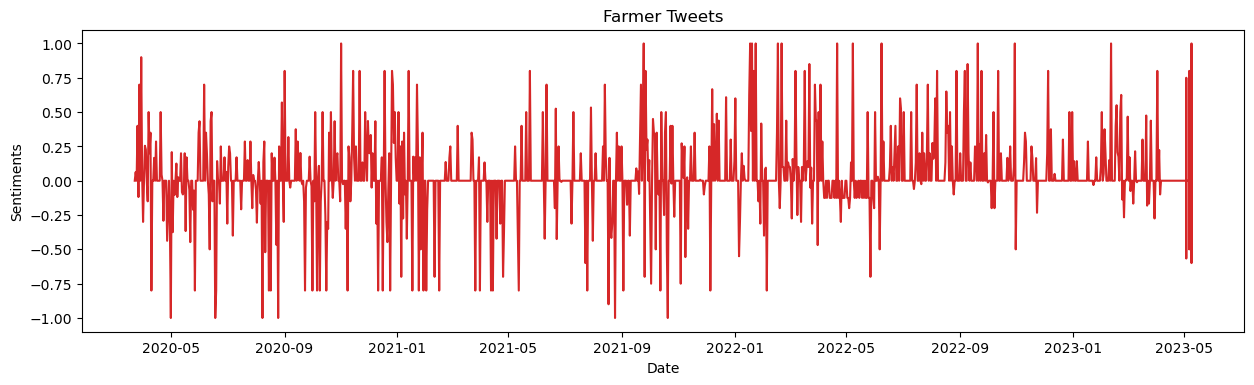

In [8]:
def plot_data(df, x, y, title="", xlabel='Date', ylabel='Sentiments', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_data(df, x=df['Date'], y=df['sentiment'], title='Farmer Tweets')

In [9]:
# Drop unrelevant variables:
cols = ['Unnamed: 0', 'ID', 'Tweet', 'Polarity_Rating', 'hastags', 'numerics', 'upper', 'stopwords']


df.drop(cols, axis=1, inplace= True)
df

,Date,word_count,char_count,sentiment
0,2020-03-23 02:30:00,3,40,0.00000
1,2020-03-24 02:31:00,10,112,0.06250
2,2020-03-25 02:31:00,12,107,0.00000
3,2020-03-26 02:32:00,12,104,0.40000
4,2020-03-27 02:32:00,17,109,-0.11875
...,...,...,...,...
1362,2023-05-09 09:31:00,24,180,-0.05000
1363,2023-05-09 09:32:00,9,76,0.00000
1364,2023-05-09 09:33:00,13,86,0.00000
1365,2023-05-09 09:34:00,4,26,0.00000


In [10]:
print(df.columns.tolist())

['Date', 'word_count', 'char_count', 'sentiment']


In [11]:
### Check out missing values:
df.isnull().sum()

Date          0
word_count    0
char_count    0
sentiment     0
dtype: int64

In [12]:
df= df.groupby('Date')['sentiment'].sum().reset_index()
df.head()

,Date,sentiment
0,2020-03-23 02:30:00,0.00000
1,2020-03-24 02:31:00,0.06250
2,2020-03-25 02:31:00,0.00000
3,2020-03-26 02:32:00,0.40000
4,2020-03-27 02:32:00,-0.11875


In [13]:
#format = '%d/%m/%Y %H:%M:%S'
#df['Date'] = pd.to_datetime(df['Date'] + df['time'].astype("string"), format=format)

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df= df.set_index('Date')
df

,sentiment
Date,
2020-03-23 02:30:00,0.00000
2020-03-24 02:31:00,0.06250
2020-03-25 02:31:00,0.00000
2020-03-26 02:32:00,0.40000
2020-03-27 02:32:00,-0.11875
...,...
2023-05-09 09:31:00,-0.05000
2023-05-09 09:32:00,0.00000
2023-05-09 09:33:00,0.00000


In [15]:
#df['sentiment'].plot()
#plt.xlabel('Date')
#plt.ylabel('sentiment')
#plt.title('Farmer Tweets')
#plt.show()

In [16]:
#create new DataFrame
monthly_Tweet = pd.DataFrame()

monthly_Tweet['sentiment'] = df['sentiment'].resample('MS').mean()

[Text(0.5, 1.0, 'Weekly Tweets'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Sentiments')]

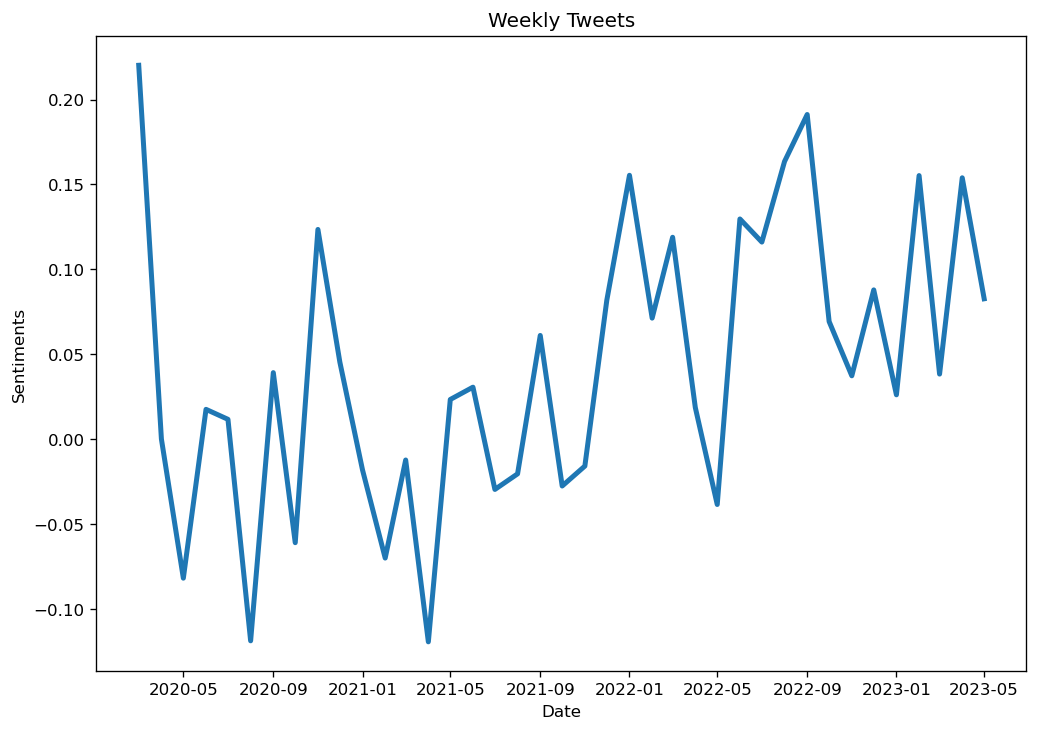

In [17]:
#plot weekly data
plt.plot(monthly_Tweet.index, monthly_Tweet.sentiment, linewidth=3)
plt.gca().set(title='Weekly Tweets', xlabel='Date', ylabel='Sentiments')

In [18]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years= df['year'].unique()
years

array([2020, 2021, 2022, 2023], dtype=int64)

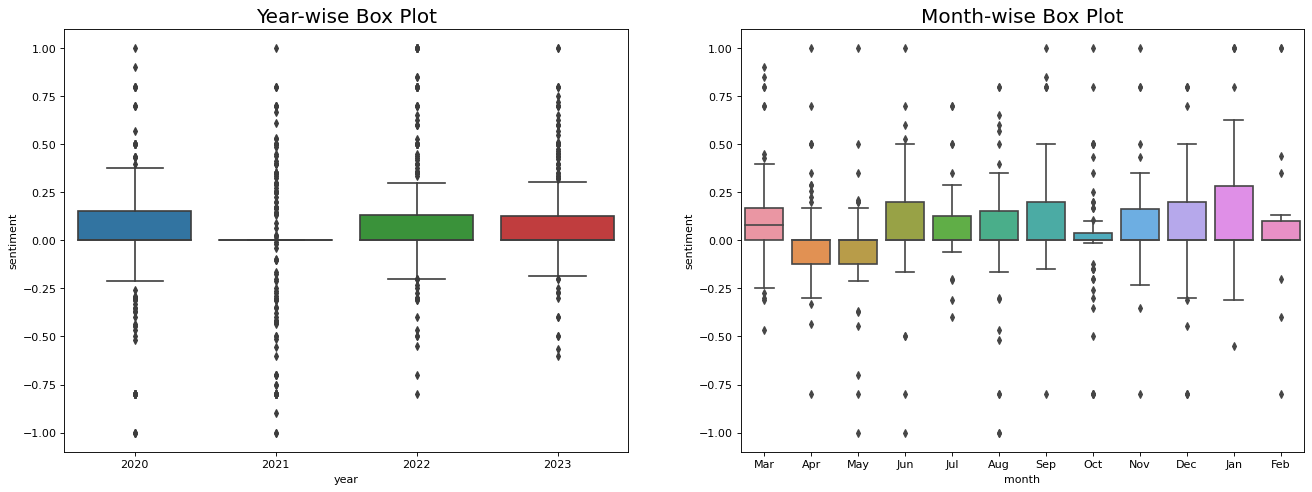

In [19]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='sentiment', data=df, ax=axes[0])
sns.boxplot(x='month', y='sentiment', data=df.loc[~df.year.isin([2021,2023]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot', fontsize=18)
plt.show()

In [20]:
import numpy as np
np.isfinite(df['sentiment'])

Date
2020-03-23 02:30:00    True
2020-03-24 02:31:00    True
2020-03-25 02:31:00    True
2020-03-26 02:32:00    True
2020-03-27 02:32:00    True
                       ... 
2023-05-09 09:31:00    True
2023-05-09 09:32:00    True
2023-05-09 09:33:00    True
2023-05-09 09:34:00    True
2023-05-09 09:36:00    True
Name: sentiment, Length: 1367, dtype: bool

In [21]:
df[df.index.isin(np.isfinite(df[['sentiment']]).query('not sentiment').index)]

,sentiment,year,month
Date,,,


In [22]:
df['sentiment'] = df['sentiment'].fillna(0)

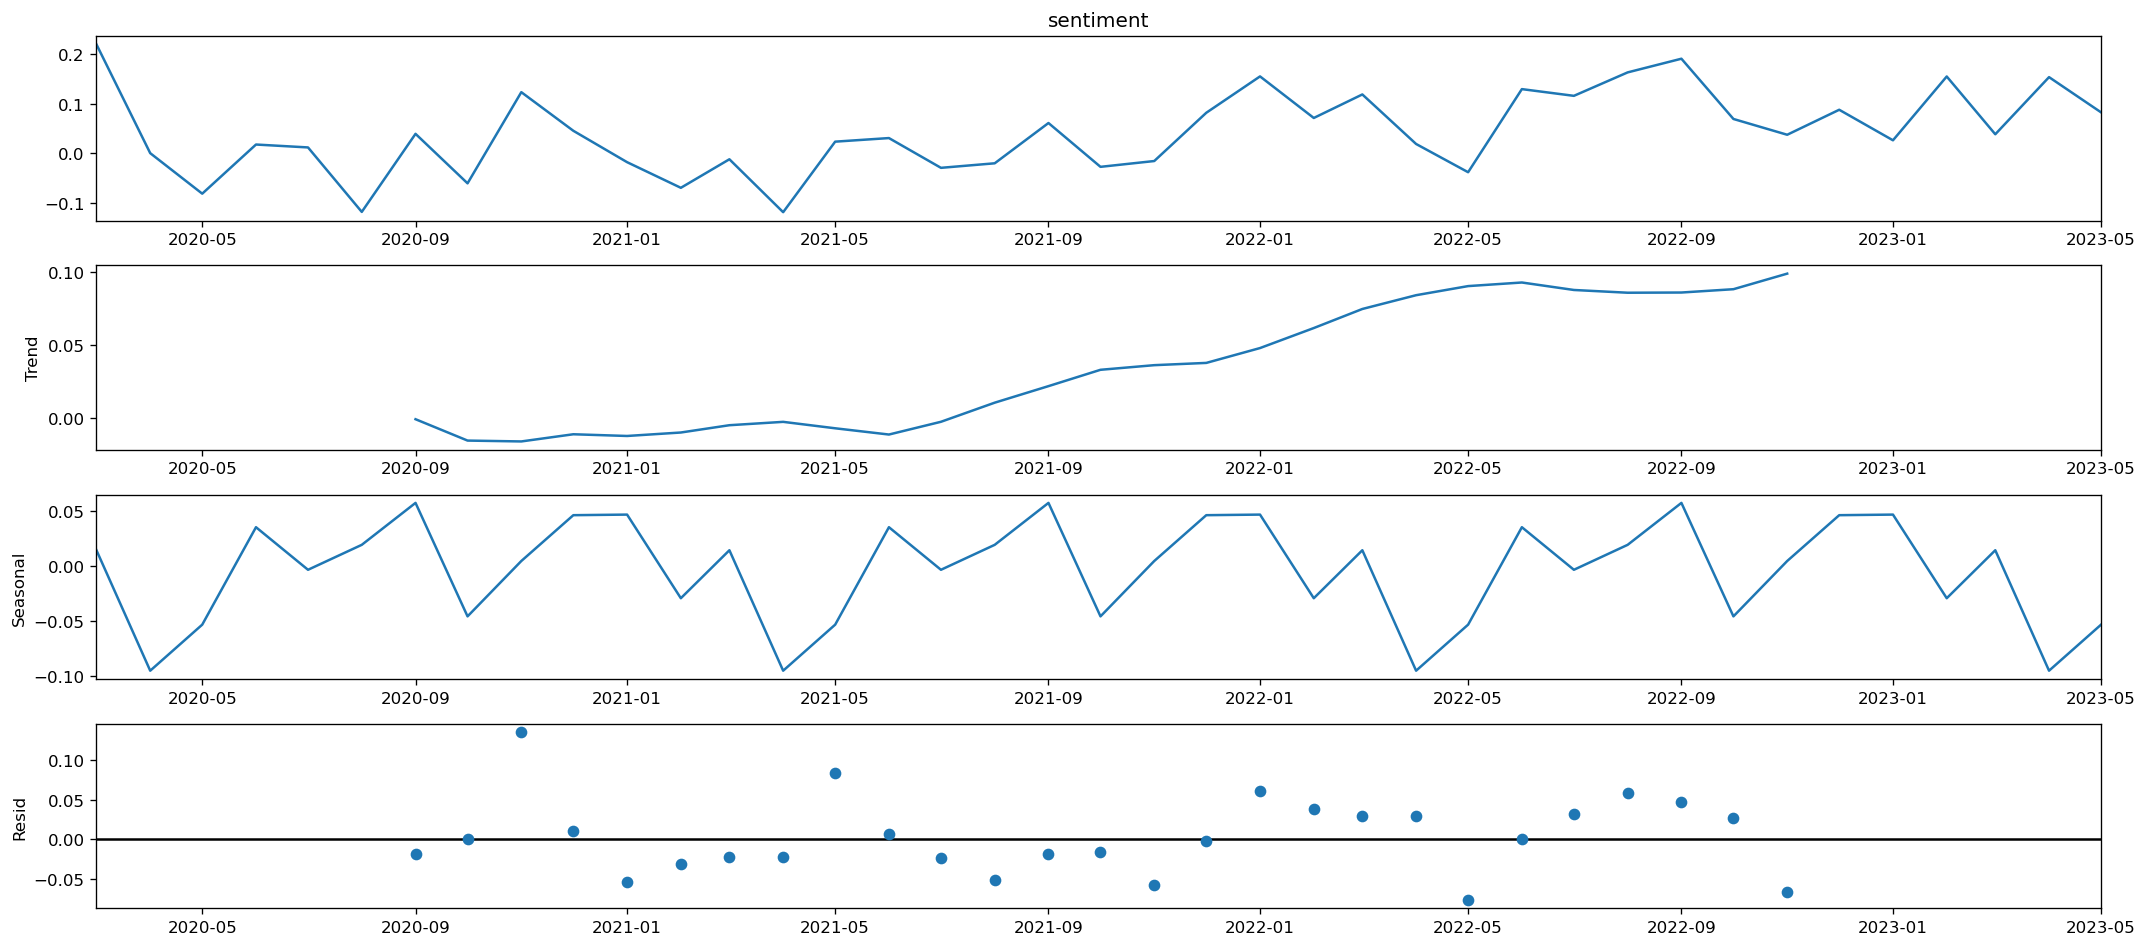

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_Tweet['sentiment'], model='additive')
fig = decomposition.plot()
plt.show()

###  Check Stationary of the Dataset 

In [24]:
#Determing rolling statistics
moving_avg = monthly_Tweet.rolling(12).mean()
moving_std= monthly_Tweet.rolling(12).std()

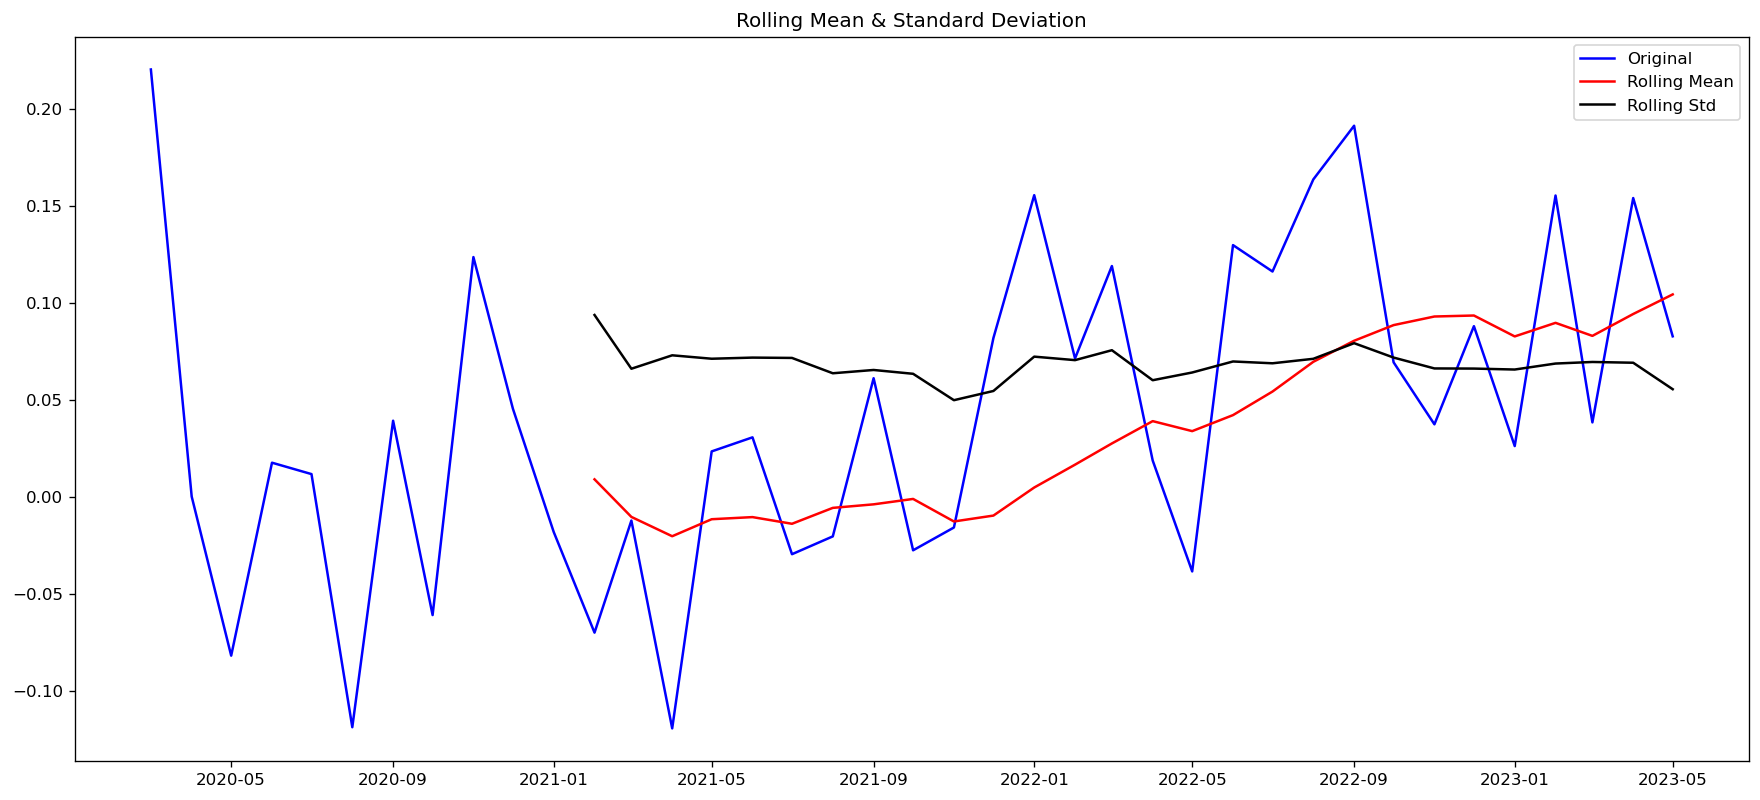

In [25]:
#Plot rolling statistics:
orig = plt.plot(monthly_Tweet, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [26]:
print(f'Number of rows with missing values: {df.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [27]:
#  conduct the Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_Tweet, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -0.864093
p-value                         0.799567
#Lags Used                      5.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


Test statistic: -0.864093

P-value: 0.799567

Since the p-value is not less than .05, this means the time series is non-stationary.

In other words, it has some time-dependent structure and does not have constant variance over time.

#### Make a Time Series Stationary 

In [197]:
df.index = pd.to_datetime(df.index)

y = df['sentiment'].resample('M').mean()

C:\Users\kftsu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


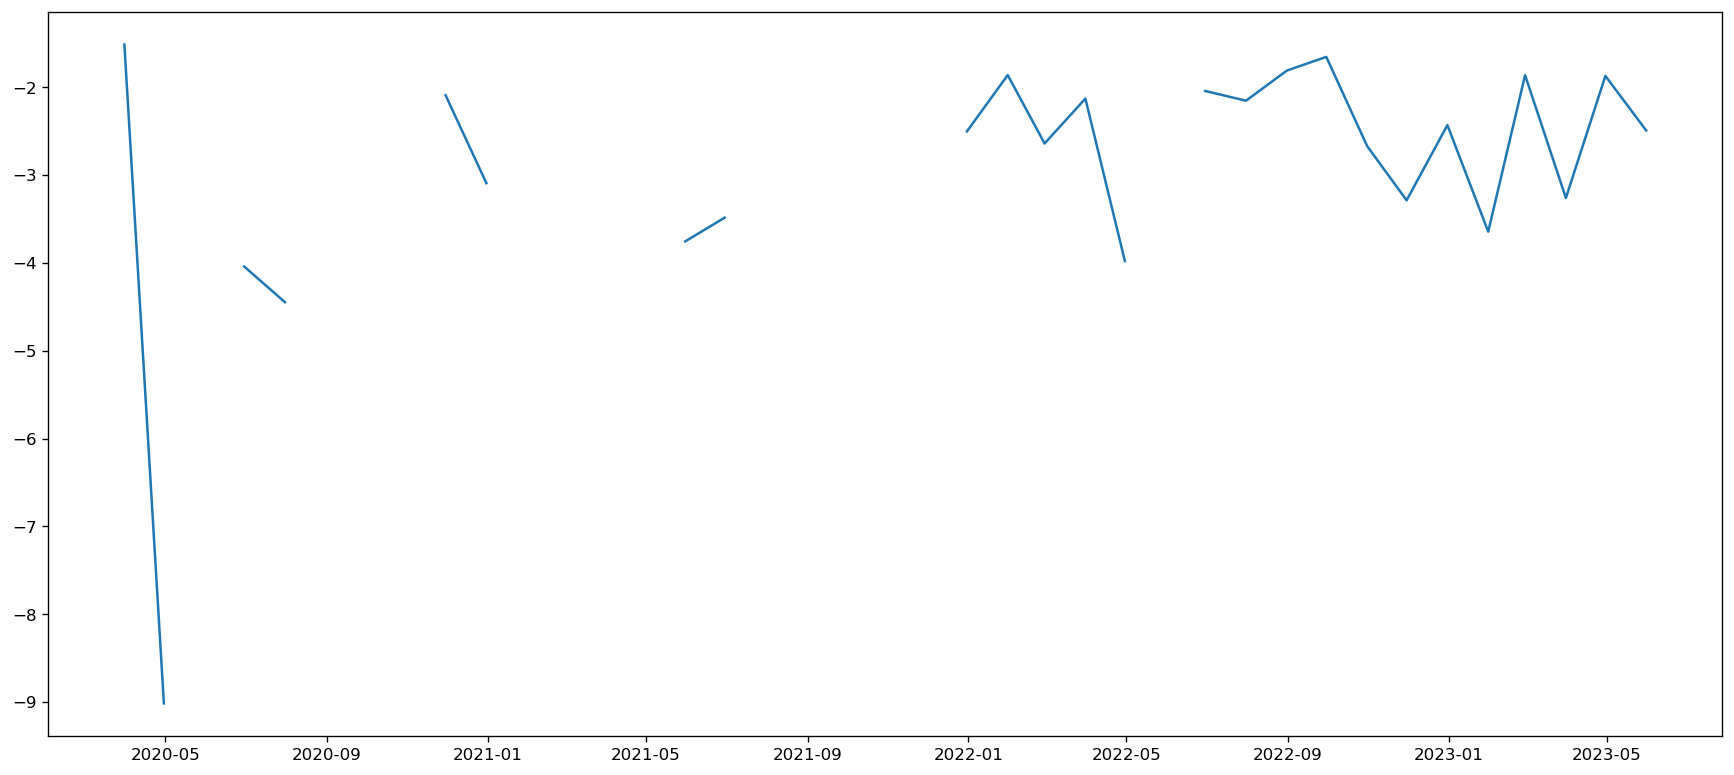

In [198]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

In this case, we can see the plot is not a forward trend in the data. So, take a log transform is not a solution to make a time-series stationary

##### Moving Average:

I want to use the last 5 values

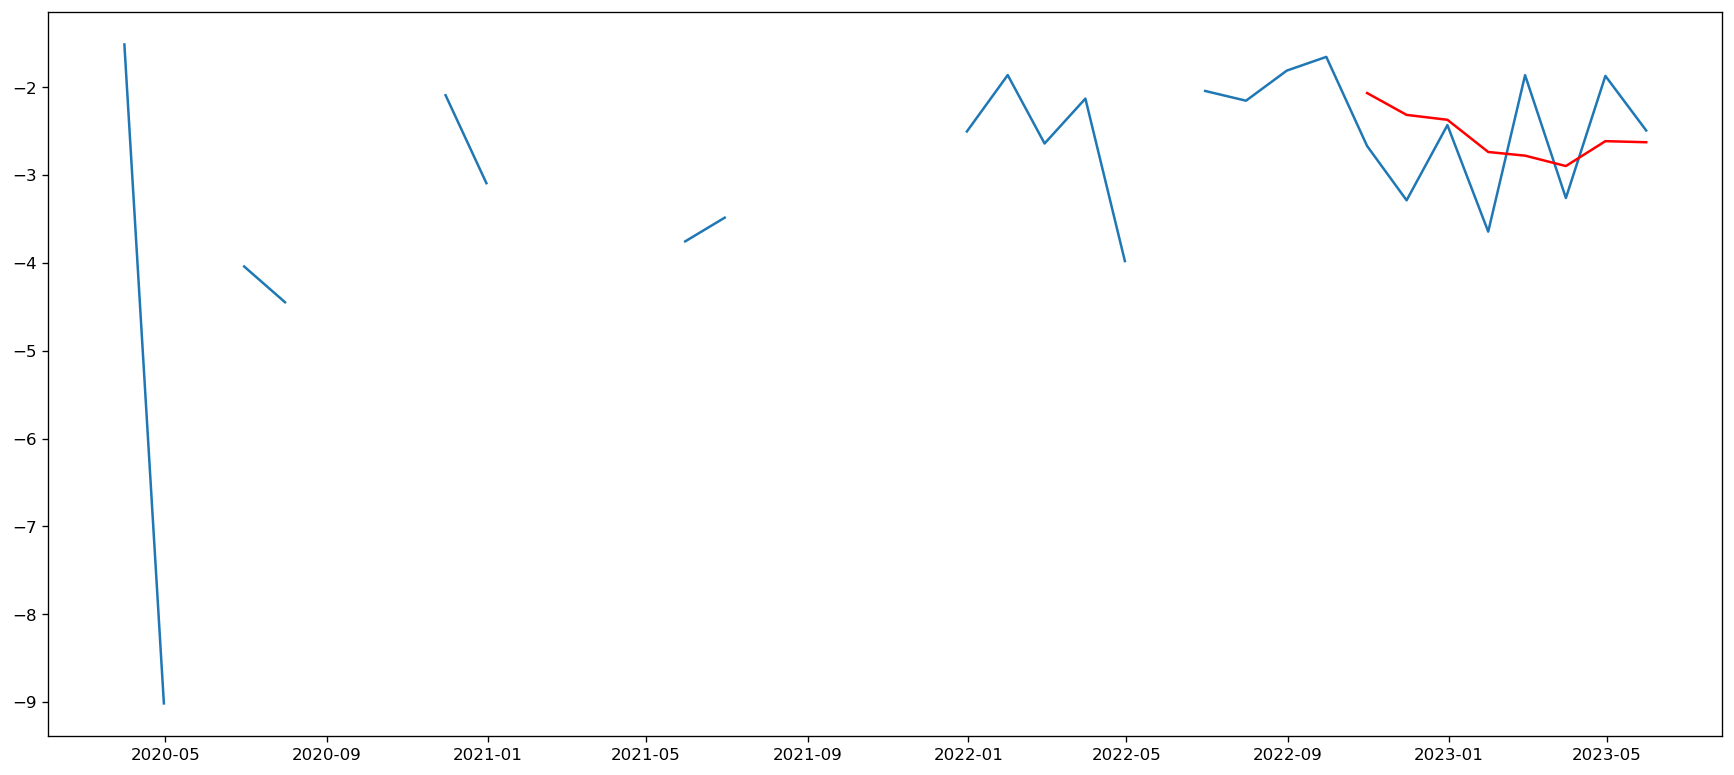

In [199]:
moving_avg = ts_log.rolling(5).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean.

Lets subtract this from the original series.

Note that since we are taking average of last 5 values, rolling mean is not defined for first 4 values. This can be observed as:

In [200]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

Date
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN
2020-06-30   NaN
2020-07-31   NaN
Freq: M, Name: sentiment, dtype: float64

Notice the first 4 being Nan.

Lets drop these NaN values and check the plots to test stationarity.

In [201]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(5).mean()
    rolstd = timeseries.rolling(5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

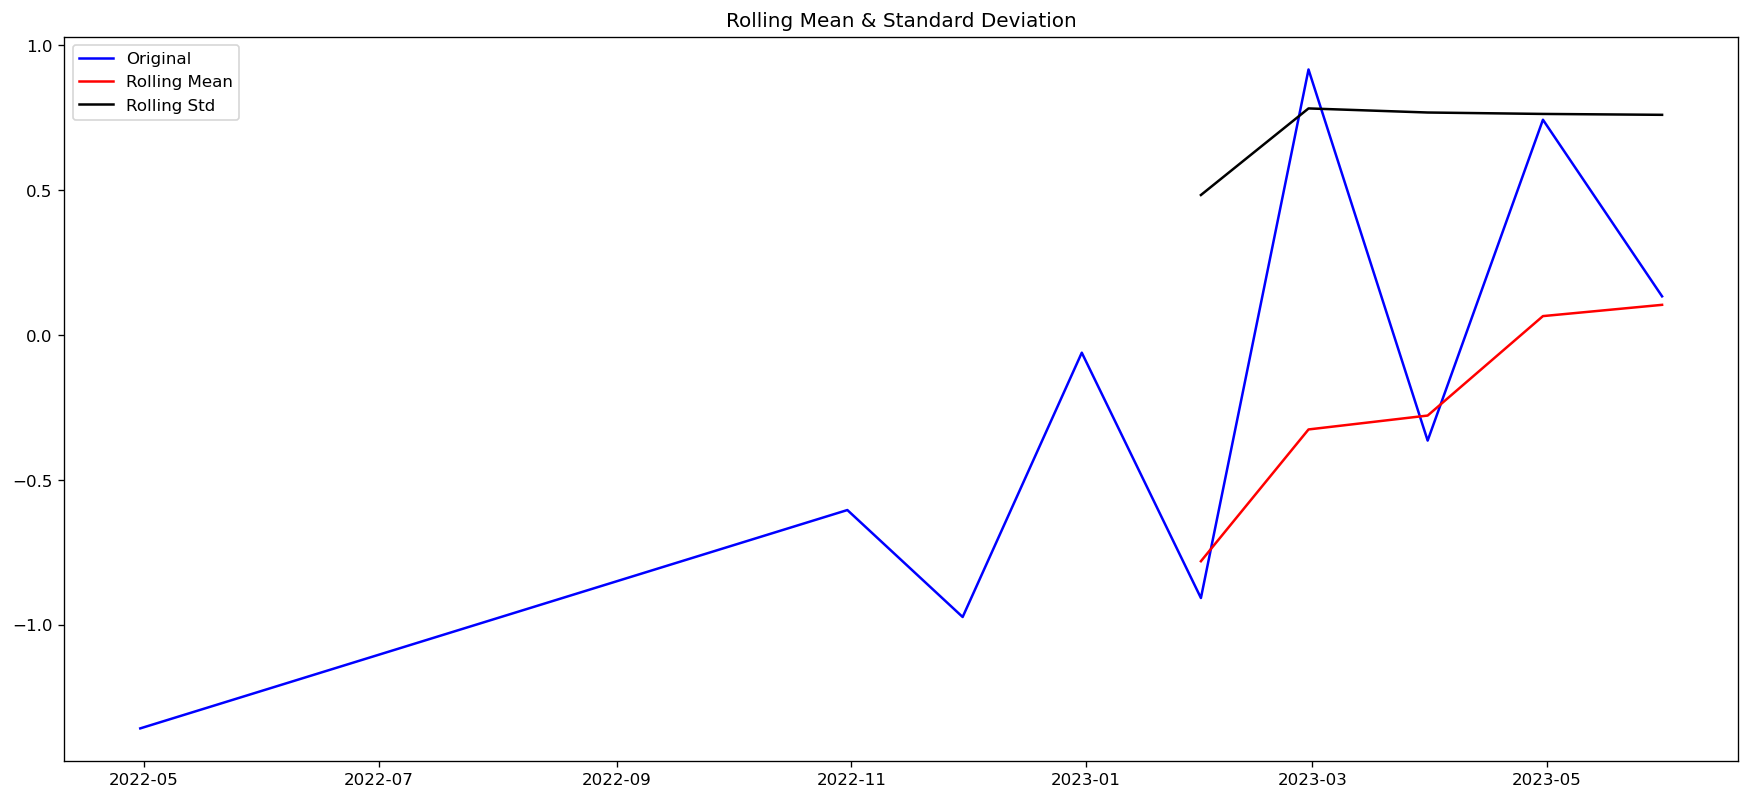

Results of Dickey-Fuller Test:
Test Statistic                -0.642847
p-value                        0.861004
#Lags Used                     1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [202]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

#### Exponentially weighted moving average

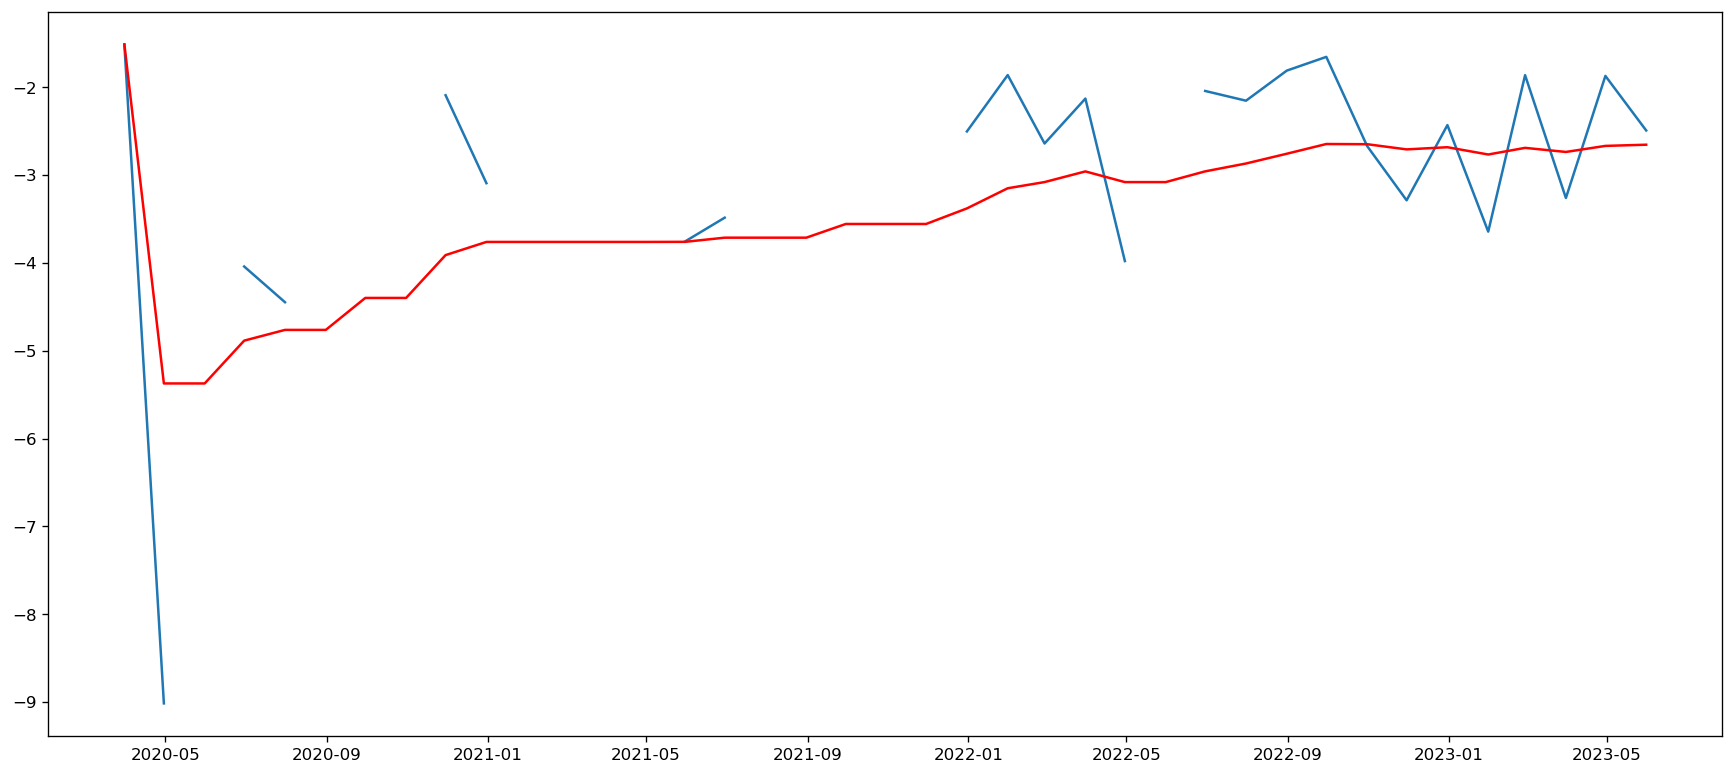

In [203]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above.


In [204]:
#ts_log_ewma_diff = ts_log - expwighted_avg
#test_stationarity(ts_log_ewma_diff)

#### Differencing:

One of the most common methods of dealing with both trend and seasonality is differencing.

In this technique, we take the difference of the observation at a particular instant with that at the previous instant.

This mostly works well in improving stationarity.

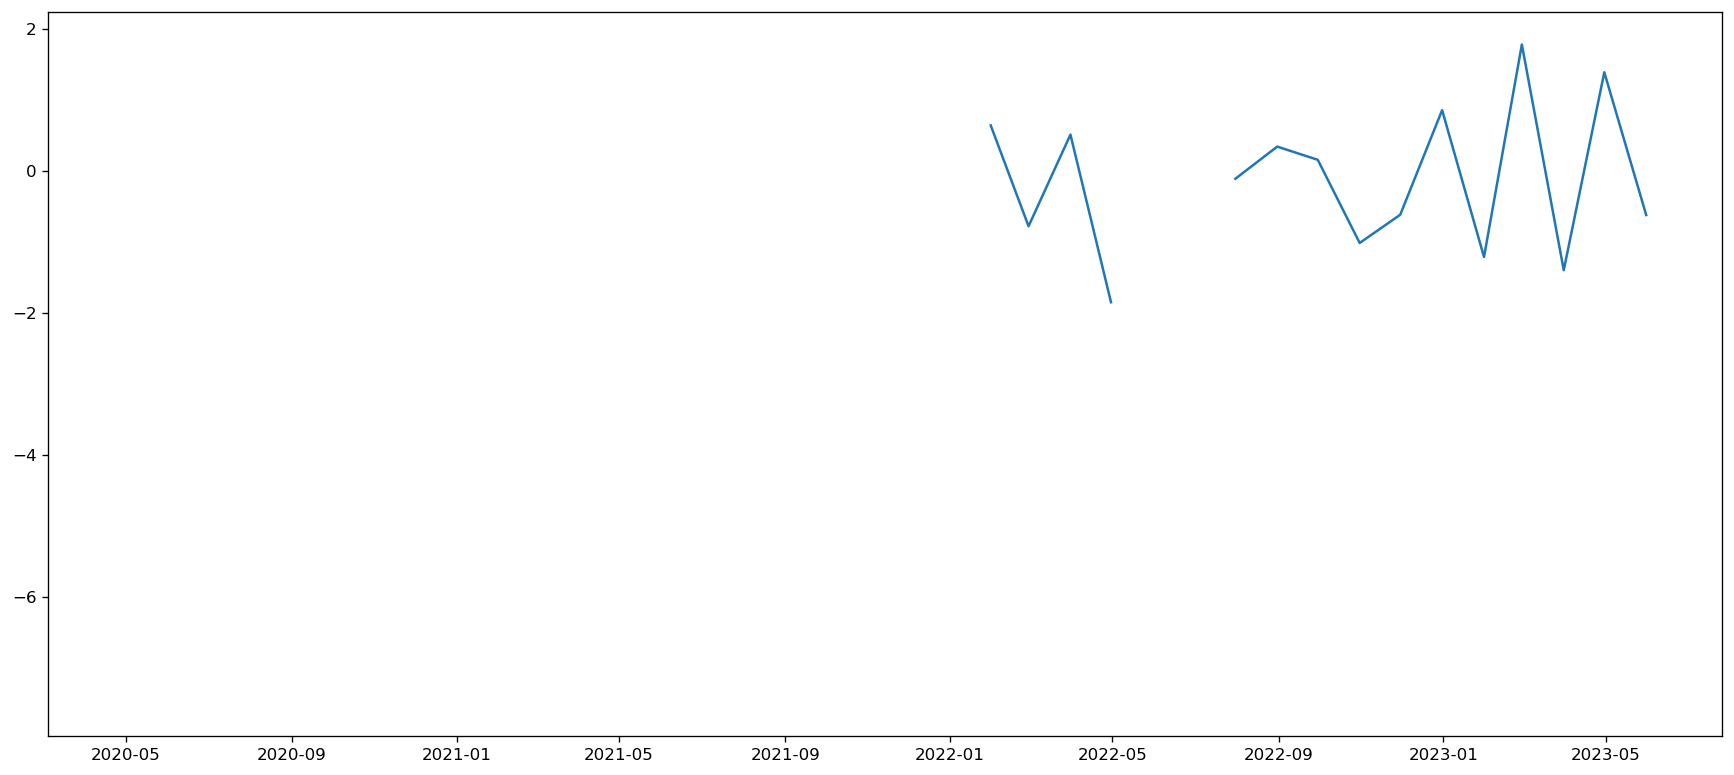

In [205]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

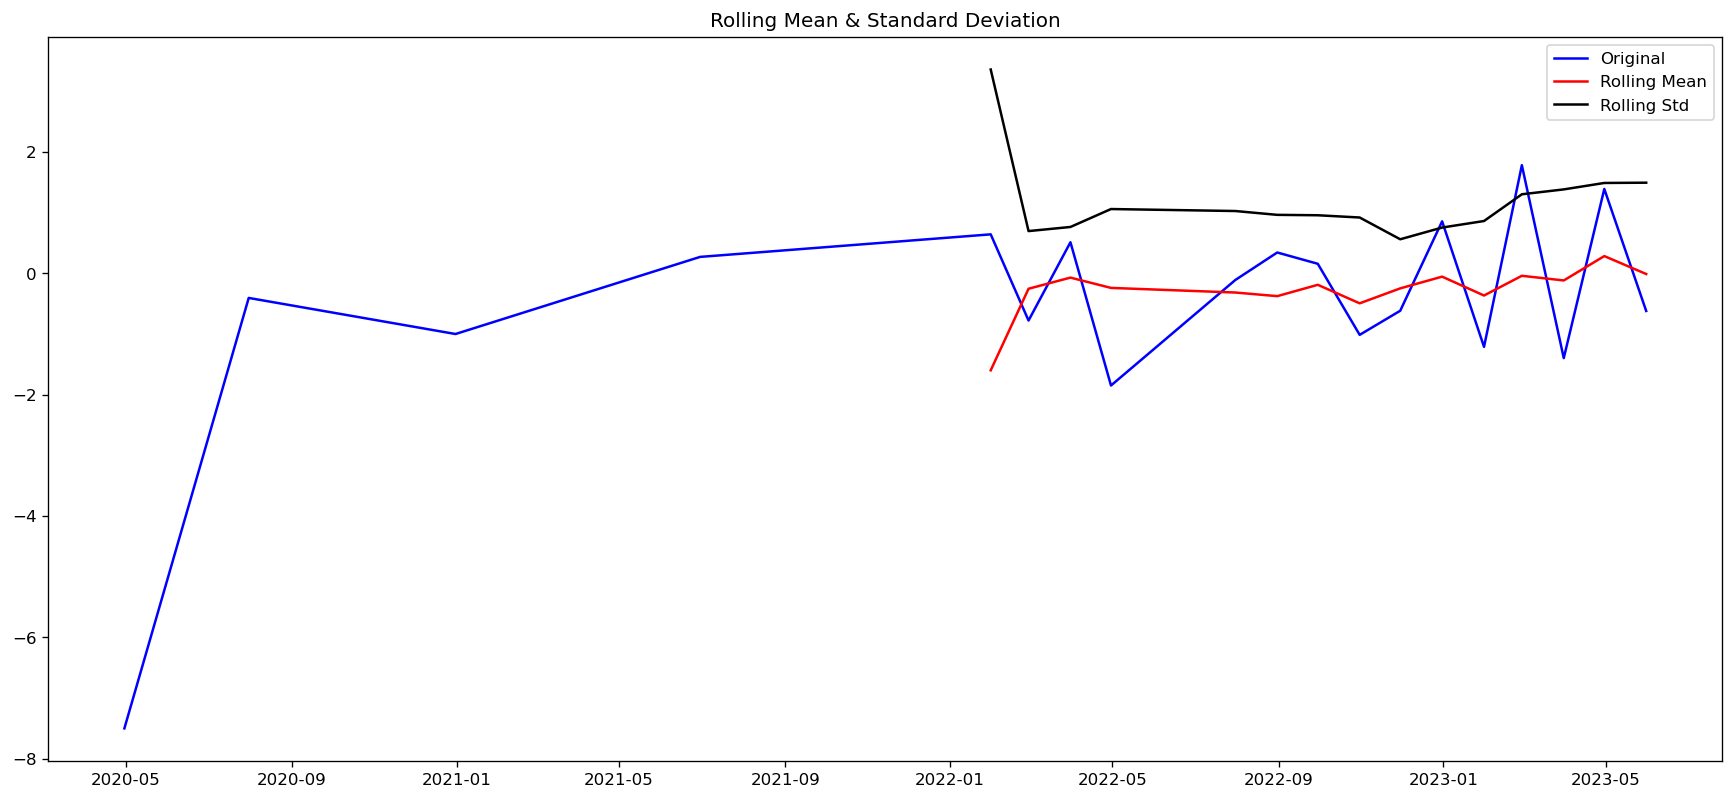

Results of Dickey-Fuller Test:
Test Statistic                  1.587866
p-value                         0.997821
#Lags Used                      7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [206]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time.

Also, the Dickey-Fuller test statistic is more than the 1% critical value, thus the TS is not stationary

#### Time Series Forecasting with ARIMA 

In [207]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

#### Hyperparameters of ARIMA model p,d,q using auto_arima

In [208]:
#print(df.columns.tolist())

In [209]:
# Drop unrelevant variables:

#cols = ['year', 'month']


#df1=df.drop(cols, axis=1, inplace= True)
#df1

In [210]:
#print(y.columns.tolist())

In [211]:
train= y[:29]
test= y[28:]

In [212]:
auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-39.799, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-19.628, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-30.119, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-39.108, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-40.599, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-40.274, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-34.276, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-39.070, Time=0.49 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-36.593, Time=0.29 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-40.002, Time=0.67 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 3.101 seconds


ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [213]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-76.568, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-79.981, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-81.125, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-80.337, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-72.796, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-79.989, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-80.568, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-78.608, Time=0.36 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-78.180, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.376 seconds


ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

#### Build ARIMA model: 

In [214]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              sentiment   No. Observations:                   29
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  29.270
Date:                Sat, 13 May 2023   AIC                            -52.540
Time:                        13:37:13   BIC                            -48.544
Sample:                    03-31-2020   HQIC                           -51.319
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0935      0.277      0.338      0.736      -0.450       0.637
ma.L1         -0.8620      0.204     -4.230      0.000      -1.261      -0.463
sigma2         0.0069      0.002      3.121      0.002       0.003       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.41   Prob(JB):                         0.70
Heteroskedasticity (H):               0.56   Skew:                            -0.23
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [215]:
pred= model.predict(start=len(train), end=(len(y)), dynamic=True)
pred

2022-08-31    0.060801
2022-09-30    0.055632
2022-10-31    0.055148
2022-11-30    0.055103
2022-12-31    0.055099
2023-01-31    0.055099
2023-02-28    0.055099
2023-03-31    0.055099
2023-04-30    0.055099
2023-05-31    0.055099
2023-06-30    0.055099
Freq: M, Name: predicted_mean, dtype: float64

In [216]:
test

Date
2022-07-31    0.116065
2022-08-31    0.163495
2022-09-30    0.191162
2022-10-31    0.069269
2022-11-30    0.037339
2022-12-31    0.087903
2023-01-31    0.026135
2023-02-28    0.155213
2023-03-31    0.038332
2023-04-30    0.153906
2023-05-31    0.082672
Freq: M, Name: sentiment, dtype: float64

#### ARIMA- Model Evaluation: using MAPE 

In [217]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.551534


Plot prediction for test value:

<AxesSubplot:xlabel='Date'>

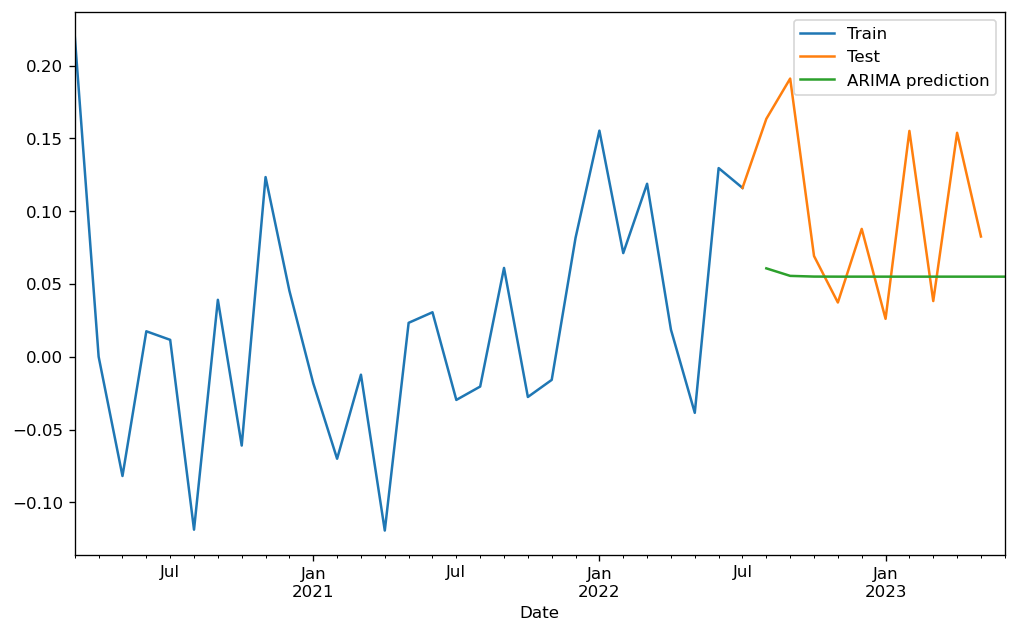

In [218]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

 FORECAST DATA USING SARIMAX model:

In [219]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

C:\Users\kftsu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          sentiment   No. Observations:                   29
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  13.772
Date:                            Sat, 13 May 2023   AIC                            -17.545
Time:                                    13:37:22   BIC                            -13.682
Sample:                                03-31-2020   HQIC                           -17.347
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4315      0.793      0.545      0.586      -1.122       1.985
ma.L1         -0.7791      0.782     -0.996      0.319      -2.312       0.754
ar.S.L12      -0.5580    698.760     -0.001      0.999   -1370.102    1368.986
ma.S.L12      -0.5572   3097.085     -0.000      1.000   -6070.731    6069.617
sigma2         0.0045      9.192      0.000      1.000     -18.012      18.021
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.42   Prob(JB):                         0.92
Heteroskedasticity (H):               0.51   Skew:                            -0.16
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [220]:
pre=results.predict(start= len(train), end= (len(y)),dynamic=True)
pre

2022-08-31   -0.010630
2022-09-30    0.115723
2022-10-31    0.013085
2022-11-30    0.153824
2022-12-31    0.119250
2023-01-31    0.092890
2023-02-28    0.042786
2023-03-31    0.120663
2023-04-30   -0.026268
2023-05-31    0.041961
2023-06-30    0.077981
Freq: M, Name: predicted_mean, dtype: float64

Plot Forecast Data:

<AxesSubplot:xlabel='Date'>

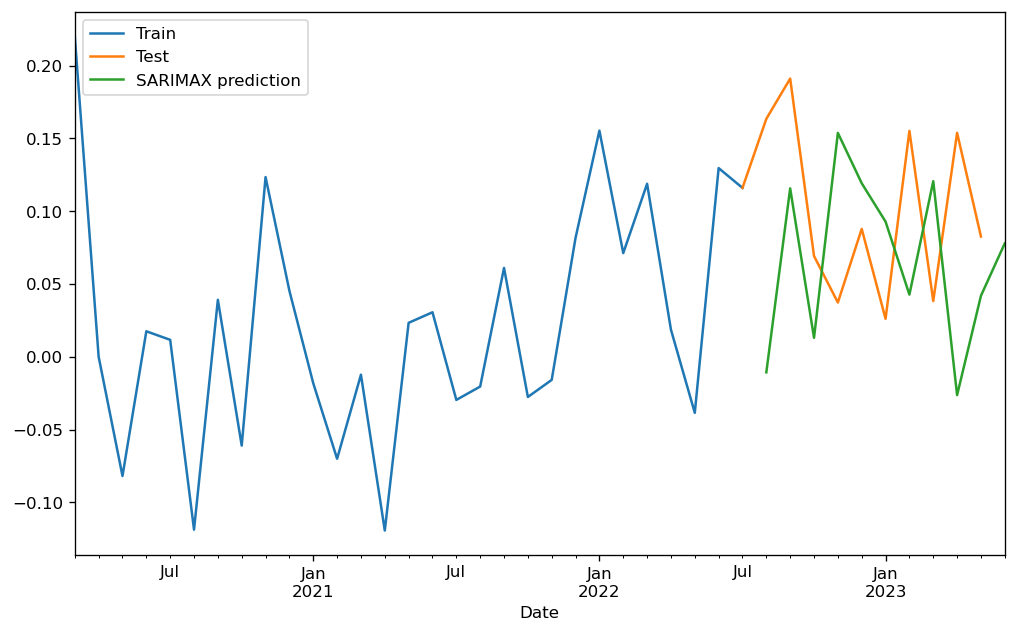

In [221]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

SARIMAX MODEL EVALUATION: MAPE 

In [222]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.828679


PREDICT FUTURE SENTIMENT WITH ARIMAX:

In [255]:
#future_sentiment_1week= results.predict(start= len(y), end=(len(y)+1))
#future_sentiment_1week

In [256]:
#y.plot(legend=True, label='Current Sentiment', figsize=(10,6))

#future_sentiment_1week.plot(legend= True, label='Future Sentiment in 1 week')

In [257]:
future_sentiment_1month= results.predict(start= len(y), end=(len(y)+1))
future_sentiment_1month

2023-06-30    0.077981
2023-07-31    0.035833
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

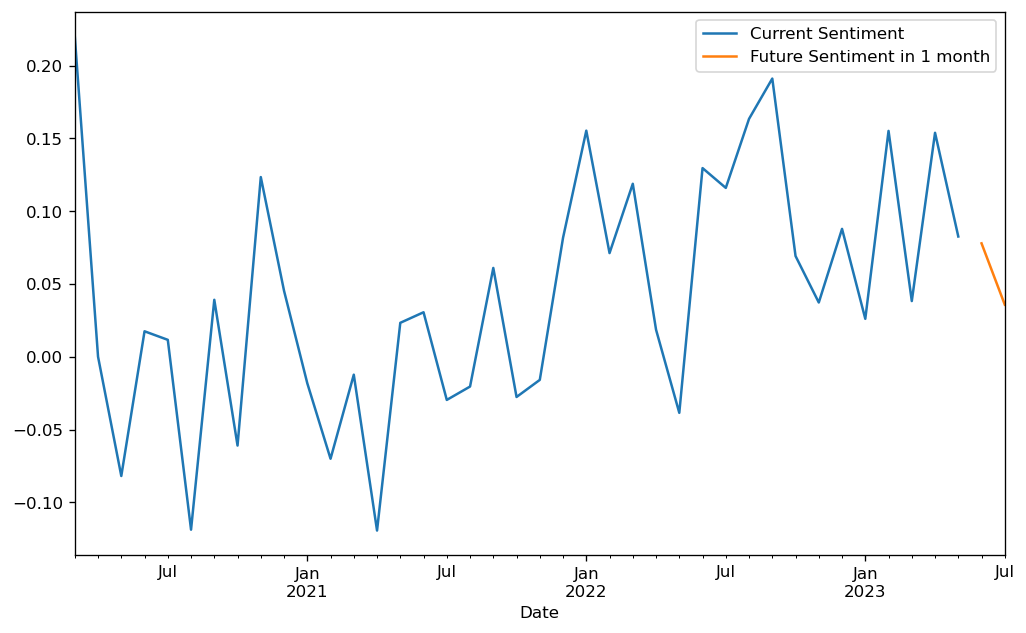

In [258]:
y.plot(legend=True, label='Current Sentiment', figsize=(10,6))

future_sentiment_1month.plot(legend= True, label='Future Sentiment in 1 month')

In [259]:
future_sentiment_3months= results.predict(start= len(y), end=(len(y)+3))
future_sentiment_3months

2023-06-30    0.077981
2023-07-31    0.035833
2023-08-31   -0.000959
2023-09-30    0.106432
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

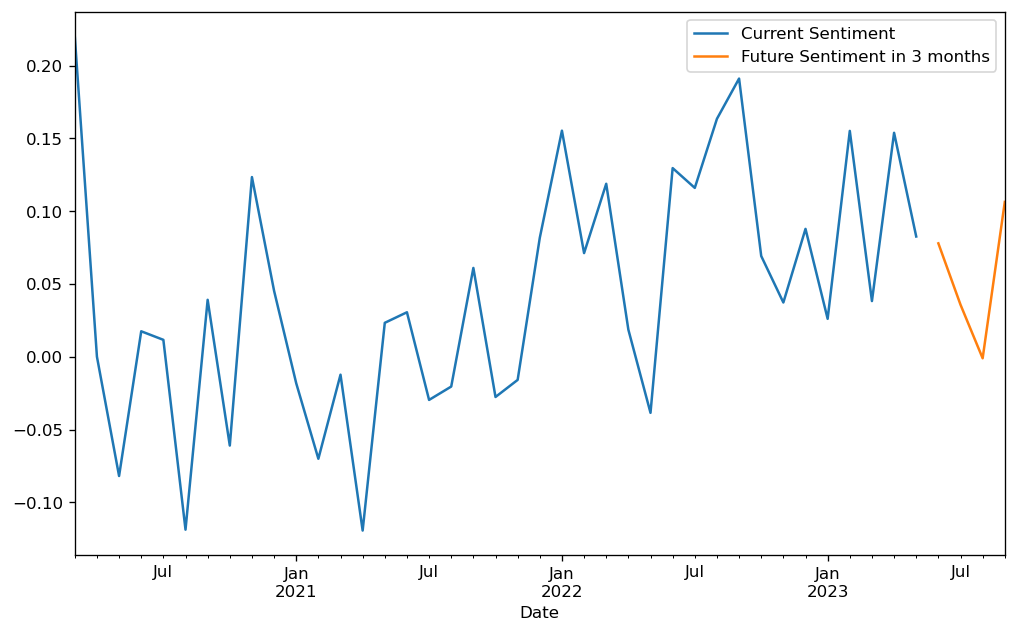

In [260]:
y.plot(legend=True, label='Current Sentiment', figsize=(10,6))

future_sentiment_3months.plot(legend= True, label='Future Sentiment in 3 months')

In [314]:
df.index = pd.to_datetime(df.index)

x = df['sentiment'].resample('7D').mean()
#df.resample('W', on='Date').sum().reset_index()

In [315]:
train1= x[:100]
test1= x[99:]

In [316]:
future_sentiment_1week= results.predict(start= len(x), end=(len(x)+7))
future_sentiment_1week

2033-11-30    0.280590
2033-12-31    0.293750
2034-01-31    0.303377
2034-02-28    0.241141
2034-03-31    0.308180
2034-04-30    0.178026
2034-05-31    0.201288
2034-06-30    0.284694
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

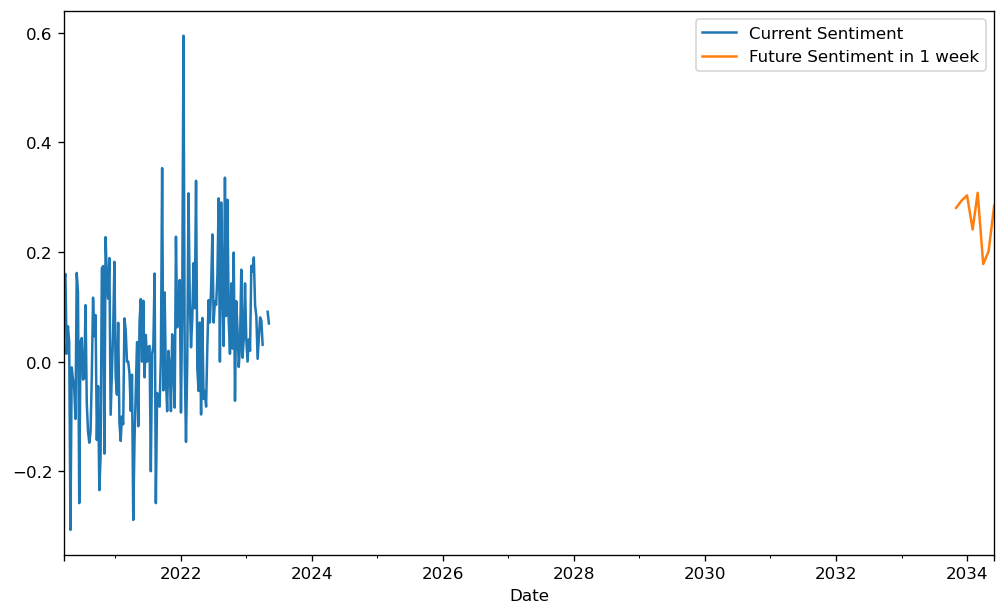

In [319]:
x.plot(legend=True, label='Current Sentiment', figsize=(10,6))

future_sentiment_1week.plot(legend= True, label='Future Sentiment in 1 week')

#plt.legend(bbox_to_anchor=(1.1, 1.05))